In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
def read_dataset():
    df = pd.read_csv("Naval Mine/dataset_40_sonar.csv")
    X = df[df.columns[0:60]].values
    Y = df[df.columns[60]]
    encode = LabelEncoder()
    encode.fit(Y)
    Y = encode.transform(Y)
    Y = one_hot_encode(Y)
    return (X,Y)

def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels]=1
    return one_hot_encode

X, Y=read_dataset()
X, Y=shuffle(X, Y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(X, Y,test_size=0.20,random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(Y.shape)



(166, 60)
(166, 2)
(42, 60)
(42, 2)
(208, 2)


In [3]:
# Important parameter and variables to work with tensors
learning_rate=0.3
training_epochs=1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim= ",n_dim)
n_class = 2
model_path = "Naval Mine/NMI"

# Define the number of layers and number of neurons for each layer

n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32,[None,n_dim])
y_ = tf.placeholder(tf.float32,[None,n_class])
w = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros(n_class))


weigths = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

#define our model
def multilayer_perceptron(x,weigths,biases):
    
    layer_1 = tf.add(tf.matmul(x, weigths['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weigths['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weigths['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weigths['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weigths['out']) + biases['out']
    return out_layer

init = tf.global_variables_initializer()

saver = tf.train.Saver()

y = multilayer_perceptron(x,weigths,biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict = {x:train_x, y_:train_y})
    cost = sess.run(cost_function, feed_dict = {x:train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    
    correct_prediction = tf.equal(tf.arg_max(y,1), tf.arg_max(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    accuracy = sess.run(accuracy, feed_dict = {x: train_x, y_:train_y})
    accuracy_history.append(accuracy)
    
    pred_y = sess.run(y, feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    
    
    print('epoch= ',epoch,' cost=',cost,' mse=',mse_,' Train_accuracy=',accuracy)


n_dim=  60
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Instructions for updating:
Use `argmax` instead
epoch=  0  cost= 119.1739  mse= 11719.692987837077  Train_accuracy= 0.45180723
epoch=  1  cost= 3.5320482  mse= 23.401057859313294  Train_accuracy= 0.5481928
epoch=  2  cost= 5.8227086  mse= 31.33302269454754  Train_accuracy= 0.45180723
epoch=  3  cost= 0.7560767  mse= 0.4882731914296032  Train_accuracy= 0.5481928
epoch=  4  cost= 0.69489497  mse= 0.32365135050813404  Train_accuracy= 0.560241
epoch=  5  cost= 0.6828029  mse= 0.31576335334490463  Train_accuracy= 0.58433735
epoch=  6  cost= 0.67804736  mse= 0.31030004420737795  Train_accuracy= 0.5903614
epoch=  7  cost= 0.6747134  mse= 0.31131719251447393  Train_accuracy= 0.57831323
epoch=  8  cost= 0.67192054  mse= 0.3172458785902289  Train_accuracy= 0.560241
epoch=  9  cost= 0.6698908  mse

epoch=  95  cost= 0.61519206  mse= 0.3408916391464711  Train_accuracy= 0.6626506
epoch=  96  cost= 0.58535504  mse= 0.4139226448573218  Train_accuracy= 0.686747
epoch=  97  cost= 0.5602775  mse= 0.6224820843808617  Train_accuracy= 0.6807229
epoch=  98  cost= 0.5462489  mse= 0.48714424943222123  Train_accuracy= 0.75301206
epoch=  99  cost= 0.5365363  mse= 0.6224652521015389  Train_accuracy= 0.7108434
epoch=  100  cost= 0.53343654  mse= 0.45757483813269184  Train_accuracy= 0.7710843
epoch=  101  cost= 0.55024284  mse= 0.7711735824761813  Train_accuracy= 0.7108434
epoch=  102  cost= 0.6096052  mse= 0.5770922803853835  Train_accuracy= 0.6325301
epoch=  103  cost= 0.5970668  mse= 0.8798593759741009  Train_accuracy= 0.6807229
epoch=  104  cost= 0.64399725  mse= 0.49802899196457867  Train_accuracy= 0.57228917
epoch=  105  cost= 0.5115494  mse= 0.4187368277370638  Train_accuracy= 0.76506025
epoch=  106  cost= 0.49042204  mse= 0.471492244342724  Train_accuracy= 0.7590361
epoch=  107  cost= 0.48

epoch=  195  cost= 0.5307848  mse= 0.674527456246417  Train_accuracy= 0.6987952
epoch=  196  cost= 0.52442616  mse= 0.664979610599548  Train_accuracy= 0.6927711
epoch=  197  cost= 0.51883733  mse= 0.6727780085129285  Train_accuracy= 0.6987952
epoch=  198  cost= 0.51292646  mse= 0.6802873303525104  Train_accuracy= 0.72289157
epoch=  199  cost= 0.507025  mse= 0.6827061703743619  Train_accuracy= 0.72289157
epoch=  200  cost= 0.5002668  mse= 0.7067523426433074  Train_accuracy= 0.71686745
epoch=  201  cost= 0.49359226  mse= 0.7219941638317693  Train_accuracy= 0.7289157
epoch=  202  cost= 0.48831582  mse= 0.8032498513234041  Train_accuracy= 0.7289157
epoch=  203  cost= 0.490192  mse= 0.768256839075599  Train_accuracy= 0.76506025
epoch=  204  cost= 0.50022835  mse= 1.0870517828633282  Train_accuracy= 0.7289157
epoch=  205  cost= 0.53958035  mse= 0.8004955559158491  Train_accuracy= 0.6686747
epoch=  206  cost= 0.506015  mse= 1.0238580734825677  Train_accuracy= 0.71686745
epoch=  207  cost= 0.4

epoch=  296  cost= 0.3176507  mse= 2.52680118358562  Train_accuracy= 0.87349397
epoch=  297  cost= 0.43661848  mse= 2.820151401282845  Train_accuracy= 0.7891566
epoch=  298  cost= 0.42859012  mse= 2.142667547857441  Train_accuracy= 0.76506025
epoch=  299  cost= 0.44711345  mse= 1.104436480233129  Train_accuracy= 0.7710843
epoch=  300  cost= 0.26949  mse= 1.7843627140277853  Train_accuracy= 0.9096386
epoch=  301  cost= 0.2337831  mse= 2.059375652090042  Train_accuracy= 0.92168677
epoch=  302  cost= 0.21419157  mse= 2.7131102253297876  Train_accuracy= 0.92771083
epoch=  303  cost= 0.20922826  mse= 2.662237725341598  Train_accuracy= 0.93373495
epoch=  304  cost= 0.2041309  mse= 2.8731445048502815  Train_accuracy= 0.93373495
epoch=  305  cost= 0.20366694  mse= 2.6477711043037355  Train_accuracy= 0.92771083
epoch=  306  cost= 0.21820381  mse= 3.0617220246709516  Train_accuracy= 0.91566265
epoch=  307  cost= 0.316812  mse= 3.128953764897446  Train_accuracy= 0.8433735
epoch=  308  cost= 0.826

epoch=  397  cost= 0.38274124  mse= 5.027379415586792  Train_accuracy= 0.8072289
epoch=  398  cost= 0.30210844  mse= 2.962297532707033  Train_accuracy= 0.82530123
epoch=  399  cost= 0.29032153  mse= 4.812611802460448  Train_accuracy= 0.8433735
epoch=  400  cost= 0.6153259  mse= 2.98583354650536  Train_accuracy= 0.64457834
epoch=  401  cost= 0.2717613  mse= 2.978132533417867  Train_accuracy= 0.92168677
epoch=  402  cost= 0.20428771  mse= 3.48543048846626  Train_accuracy= 0.9518072
epoch=  403  cost= 0.16529277  mse= 4.154172950937772  Train_accuracy= 0.94578314
epoch=  404  cost= 0.14394385  mse= 4.771631968265153  Train_accuracy= 0.9518072
epoch=  405  cost= 0.13324845  mse= 5.288022549363687  Train_accuracy= 0.9518072
epoch=  406  cost= 0.12380099  mse= 5.751619253498251  Train_accuracy= 0.9518072
epoch=  407  cost= 0.118015036  mse= 5.811359725288751  Train_accuracy= 0.9518072
epoch=  408  cost= 0.11394636  mse= 5.932179665347914  Train_accuracy= 0.9578313
epoch=  409  cost= 0.111155

epoch=  498  cost= 0.053033873  mse= 8.257597258413796  Train_accuracy= 0.9879518
epoch=  499  cost= 0.063735224  mse= 7.45958145122699  Train_accuracy= 0.9879518
epoch=  500  cost= 0.056596756  mse= 8.339489982080295  Train_accuracy= 0.9879518
epoch=  501  cost= 0.06656984  mse= 7.470068658676726  Train_accuracy= 0.9879518
epoch=  502  cost= 0.05905148  mse= 8.394869275333116  Train_accuracy= 0.9879518
epoch=  503  cost= 0.08222232  mse= 7.336978601677139  Train_accuracy= 0.9879518
epoch=  504  cost= 0.09849796  mse= 9.243985303947191  Train_accuracy= 0.9698795
epoch=  505  cost= 0.31783983  mse= 7.344038817406248  Train_accuracy= 0.8433735
epoch=  506  cost= 0.50031924  mse= 12.349030938515078  Train_accuracy= 0.7891566
epoch=  507  cost= 1.2795311  mse= 10.110840068143224  Train_accuracy= 0.560241
epoch=  508  cost= 0.9776006  mse= 2.0105467712189085  Train_accuracy= 0.53614455
epoch=  509  cost= 1.609752  mse= 11.186920928661621  Train_accuracy= 0.48795182
epoch=  510  cost= 0.6214

epoch=  599  cost= 0.11264559  mse= 3.940941664892383  Train_accuracy= 0.9518072
epoch=  600  cost= 0.10376206  mse= 4.432753884678354  Train_accuracy= 0.9578313
epoch=  601  cost= 0.0991035  mse= 4.5833461323969145  Train_accuracy= 0.96385545
epoch=  602  cost= 0.095054425  mse= 4.915541959836657  Train_accuracy= 0.96385545
epoch=  603  cost= 0.091980234  mse= 5.010288712866705  Train_accuracy= 0.9698795
epoch=  604  cost= 0.08847706  mse= 5.243669026867587  Train_accuracy= 0.9698795
epoch=  605  cost= 0.08607365  mse= 5.181291770760192  Train_accuracy= 0.9698795
epoch=  606  cost= 0.08270517  mse= 5.485157611890227  Train_accuracy= 0.97590363
epoch=  607  cost= 0.0810294  mse= 5.446578157934032  Train_accuracy= 0.97590363
epoch=  608  cost= 0.08039109  mse= 5.871311964149743  Train_accuracy= 0.97590363
epoch=  609  cost= 0.08235428  mse= 5.4969372729228585  Train_accuracy= 0.9698795
epoch=  610  cost= 0.087826505  mse= 6.320279894420927  Train_accuracy= 0.97590363
epoch=  611  cost= 

epoch=  700  cost= 0.051826563  mse= 6.411182424997027  Train_accuracy= 0.9879518
epoch=  701  cost= 0.050529223  mse= 6.595552791389488  Train_accuracy= 0.9939759
epoch=  702  cost= 0.04907021  mse= 6.637278035490574  Train_accuracy= 0.9879518
epoch=  703  cost= 0.047805987  mse= 6.815985419257517  Train_accuracy= 0.9939759
epoch=  704  cost= 0.04638715  mse= 6.895538807591482  Train_accuracy= 0.9939759
epoch=  705  cost= 0.045280267  mse= 7.057662471053303  Train_accuracy= 0.9939759
epoch=  706  cost= 0.044174172  mse= 7.064387266522933  Train_accuracy= 0.9939759
epoch=  707  cost= 0.043178327  mse= 7.331164921296183  Train_accuracy= 0.9939759
epoch=  708  cost= 0.04261663  mse= 7.191191003139489  Train_accuracy= 0.9939759
epoch=  709  cost= 0.042347055  mse= 7.626151844744141  Train_accuracy= 0.9939759
epoch=  710  cost= 0.04253167  mse= 7.226436042076017  Train_accuracy= 0.9939759
epoch=  711  cost= 0.043664694  mse= 8.033588884303661  Train_accuracy= 0.9939759
epoch=  712  cost= 0

epoch=  804  cost= 0.023930352  mse= 10.07968699312817  Train_accuracy= 1.0
epoch=  805  cost= 0.023527153  mse= 10.363205664767323  Train_accuracy= 1.0
epoch=  806  cost= 0.023184597  mse= 10.305324934249004  Train_accuracy= 1.0
epoch=  807  cost= 0.022876944  mse= 10.440182847023792  Train_accuracy= 1.0
epoch=  808  cost= 0.02260175  mse= 10.394838918050631  Train_accuracy= 1.0
epoch=  809  cost= 0.02230964  mse= 10.552412627799821  Train_accuracy= 1.0
epoch=  810  cost= 0.022004843  mse= 10.524955240990746  Train_accuracy= 1.0
epoch=  811  cost= 0.021731935  mse= 10.63863374616759  Train_accuracy= 1.0
epoch=  812  cost= 0.021475714  mse= 10.614849407813512  Train_accuracy= 1.0
epoch=  813  cost= 0.02119415  mse= 10.716860292782496  Train_accuracy= 1.0
epoch=  814  cost= 0.020937009  mse= 10.768633136747894  Train_accuracy= 1.0
epoch=  815  cost= 0.020702427  mse= 10.778477595573827  Train_accuracy= 1.0
epoch=  816  cost= 0.02044476  mse= 10.867206592354366  Train_accuracy= 1.0
epoch

epoch=  911  cost= 0.008737452  mse= 14.351065604703617  Train_accuracy= 1.0
epoch=  912  cost= 0.008683607  mse= 14.38141512963105  Train_accuracy= 1.0
epoch=  913  cost= 0.00863133  mse= 14.417030773011518  Train_accuracy= 1.0
epoch=  914  cost= 0.00858814  mse= 14.450422093939737  Train_accuracy= 1.0
epoch=  915  cost= 0.008540666  mse= 14.505014766816736  Train_accuracy= 1.0
epoch=  916  cost= 0.008482938  mse= 14.499875799617842  Train_accuracy= 1.0
epoch=  917  cost= 0.008428114  mse= 14.53220496245223  Train_accuracy= 1.0
epoch=  918  cost= 0.008377095  mse= 14.576454873003357  Train_accuracy= 1.0
epoch=  919  cost= 0.008338795  mse= 14.596386284704035  Train_accuracy= 1.0
epoch=  920  cost= 0.008291296  mse= 14.641913960188456  Train_accuracy= 1.0
epoch=  921  cost= 0.00823426  mse= 14.648916262383565  Train_accuracy= 1.0
epoch=  922  cost= 0.008183822  mse= 14.691393923977365  Train_accuracy= 1.0
epoch=  923  cost= 0.008137476  mse= 14.724174254581374  Train_accuracy= 1.0
epoc

Model Saved in file :  Naval Mine/NMI


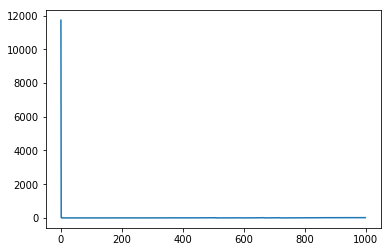

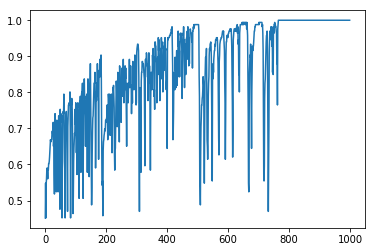

In [4]:
save_path = saver.save(sess,model_path)

print('Model Saved in file : ',save_path)
plt.plot(mse_history)
plt.show()
plt.plot(accuracy_history)
plt.show()

In [5]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('Test Accuracy= ',(sess.run(accuracy, feed_dict={x: test_x, y_:test_y})))

pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE= ',sess.run(mse))

Test Accuracy=  0.8333333
MSE=  16.56451111439289
